---
---
# NON-LINEAR REGRESSON MODELS
---
---

* GEREKLİ KÜTÜPHANELER

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection    import train_test_split, GridSearchCV
from sklearn.metrics            import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing      import scale
from sklearn.preprocessing      import StandardScaler
from sklearn                    import model_selection
from sklearn.linear_model       import LinearRegression
from sklearn.tree               import DecisionTreeRegressor
from sklearn.neighbors          import KNeighborsRegressor
from sklearn.neural_network     import MLPRegressor
from sklearn.ensemble           import RandomForestRegressor
from sklearn.ensemble           import GradientBoostingRegressor
from sklearn                    import neighbors
from sklearn.svm                import SVR

In [15]:
from warnings import filterwarnings
filterwarnings("ignore")

---
# K EN YAKIN KOMŞU MODELİ
---

In [16]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

In [17]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,True,False,True
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,True,False,True
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,False,True,False
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,False,False,False
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,True,True,True


In [18]:
X_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
148,497.0,136.0,7.0,58.0,38.0,26.0,11.0,3871.0,1066.0,40.0,450.0,367.0,241.0,304.0,347.0,10.0,False,False,False
154,537.0,147.0,23.0,58.0,88.0,47.0,10.0,2744.0,730.0,97.0,302.0,351.0,174.0,92.0,257.0,20.0,True,False,True
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,False,False,False
279,439.0,96.0,0.0,44.0,36.0,65.0,4.0,711.0,148.0,1.0,68.0,56.0,99.0,229.0,406.0,22.0,True,False,True
88,155.0,41.0,12.0,21.0,29.0,22.0,16.0,5409.0,1338.0,181.0,746.0,805.0,875.0,165.0,9.0,1.0,False,True,False


# MODEL KURMA

In [19]:
knn_model = KNeighborsRegressor().fit(X_train,Y_train)
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [20]:
dir(knn_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate

# MODEL TAHMİN

In [21]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [22]:
y_pred = knn_model.predict(X_test)

In [23]:
RMSE = np.sqrt(mean_squared_error(Y_test,y_pred))   #ilkel şekilde test hatası bulma
RMSE                                                #valide edilmemiş train hatası.

np.float64(426.6570764525201)

# MODEL TUNİNG

In [24]:
#knn'nin hiperparametresi n_neighbors = 5

In [25]:
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,Y_train)
    y_pred = knn_model.predict(X_test)
    rmse   = np.sqrt(mean_squared_error(Y_test,y_pred))
    RMSE.append(rmse)
    print("k=",k," için RMSE değeri:", rmse)
#k için en uygun değer [1,10] için 8'miş. şimdi bunu otomatik şekilde bulalım.

k= 1  için RMSE değeri: 455.03925390751965
k= 2  için RMSE değeri: 415.99629571490965
k= 3  için RMSE değeri: 420.6765370082348
k= 4  için RMSE değeri: 428.8564674588792
k= 5  için RMSE değeri: 426.6570764525201
k= 6  için RMSE değeri: 423.5071669008732
k= 7  için RMSE değeri: 414.9361222421057
k= 8  için RMSE değeri: 413.7094731463598
k= 9  için RMSE değeri: 417.84419990871265
k= 10  için RMSE değeri: 421.6252180741266


In [26]:
#GridSearchCV
knn_params = {"n_neighbors": np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,Y_train)
knn_cv_model.best_params_

{'n_neighbors': np.int64(8)}

In [27]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,Y_train)

In [28]:
#tune edilmiş modelin test hatası
y_pred = knn_tuned.predict(X_test)
RMSE = np.sqrt(mean_squared_error(Y_test,y_pred))   #ilkel şekilde test hatası bulma
RMSE                                                #valide edilmemiş train hatası.

np.float64(413.7094731463598)

---
# DESTEK VEKTÖR REGRESYONU (SUPPORT VECTOR REGRESSİON) SVR MODELİ
---

In [29]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [30]:
svr_model = SVR(kernel="linear").fit(X_train,Y_train)
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# MODEL TAHMİN

In [31]:
svr_model.predict(X_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [32]:
svr_model.predict(X_test)[0:5]

array([679.14754919, 633.72883529, 925.68639938, 270.28464317,
       530.26659421])

In [33]:
svr_model.intercept_

array([-80.15196063])

In [34]:
svr_model.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [35]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred)) #linear için bu şekilde

np.float64(370.0408415795005)

In [36]:
#radial/linear olmayan için ise şu şekilde;
svr_model = SVR(kernel="rbf").fit(X_train,Y_train)
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [37]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(460.0032657244849)

In [38]:
#eski hâline getirmek
svr_model = SVR(kernel="linear").fit(X_train,Y_train)
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(370.0408415795005)

# MODEL TUNİNG

In [39]:
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [40]:
svr_params = {"C":[0.1,0.5,1,3]} #sayıları kafamızdan verdik.
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5).fit(X_train,Y_train)

In [41]:
svr_cv_model.best_params_

{'C': 0.5}

In [42]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5, verbose=2,n_jobs=-1).fit(X_train,Y_train) 
#verbose= 2 işlemleri yaparken zaman/süre gibi raporları verir.
#n_jobs  =-1 max işlemci gücünü kullanmanı sağlar.
svr_cv_model.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'C': 0.5}

In [43]:
#final model
svr_tuned = SVR(kernel="linear",C=0.5).fit(X_train,Y_train)
y_pred    = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(367.98747616655294)

---
# YAPAY SİNİR AĞLARI
---

In [44]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [45]:
#standartlaştırma
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [46]:
mlp_model = MLPRegressor().fit(X_train_scaled,Y_train)
mlp_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# MODEL TAHMİN

In [47]:
mlp_model.predict(X_test_scaled)[0:5]

array([18.1732154 , 36.37370807, 67.9101599 ,  7.6809773 , 27.06939947])

In [48]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(658.5900040631069)

# MODEL TUNİNG

In [49]:
mlp_params = {"alpha": [0.1,0.01,0.02,0.001,0.0001],
              "hidden_layer_sizes": [(10,20),(5,5),(100,100)]
              }

In [50]:
mpl_cv_model = GridSearchCV(mlp_model,mlp_params, cv=10,verbose=2,n_jobs=-1).fit(X_train_scaled,Y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [51]:
mpl_cv_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

In [52]:
#final model
mlp_tuned = MLPRegressor(alpha=0.1,hidden_layer_sizes=(100,100)).fit(X_train_scaled,Y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(353.44166290606313)

---
# CART (CLASSIFICATION AND REGRESSION TREE)
---

In [53]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

In [54]:
X_train = pd.DataFrame(X_train["Hits"])
X_test  = pd.DataFrame(X_test["Hits"])

In [55]:
X_test.head()

,Hits
148,136.0
154,147.0
318,136.0
279,96.0
88,41.0


# MODEL KURMA

In [56]:
cart_model = DecisionTreeRegressor().fit(X_train,Y_train)
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

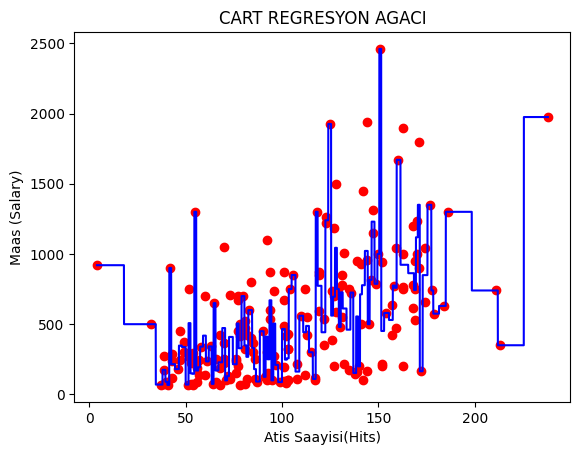

In [57]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X_train,Y_train,color ="red")
plt.plot(X_grid, cart_model.predict(X_grid), color="blue")

plt.title("CART REGRESYON AGACI")
plt.xlabel("Atis Saayisi(Hits)")
plt.ylabel("Maas (Salary)");

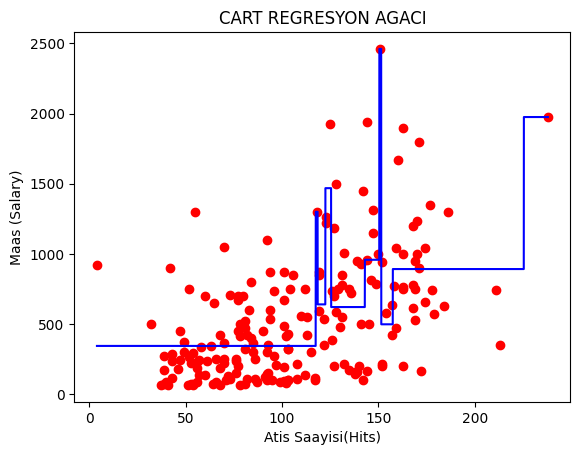

In [58]:
#maks dallanma sayısını kontrol edersek;
cart_model = DecisionTreeRegressor(max_leaf_nodes =10).fit(X_train,Y_train)

X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X_train,Y_train,color ="red")
plt.plot(X_grid, cart_model.predict(X_grid), color="blue")

plt.title("CART REGRESYON AGACI")
plt.xlabel("Atis Saayisi(Hits)")
plt.ylabel("Maas (Salary)");

# MODEL TAHMİN

In [59]:
# Tek degiskenli Tahmin
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(486.34593105235456)

In [60]:
# Tum degiskenlerle Tahmin
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.




cart_model = DecisionTreeRegressor().fit(X_train,Y_train)
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [61]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(444.0486464528135)

# MODEL TUNİNG

En önemli parametreler
* min_sample_split ve max_depth

In [62]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [63]:
cart_model = DecisionTreeRegressor(max_depth=3).fit(X_train,Y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(391.5530522634766)

In [64]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=3)
File:        c:\users\giray\appdata\local\programs\python\python312\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in the half mean Poisson deviance to find splits.

    ..

In [65]:
cart_params = {"max_depth"        : [2,3,4,5,10,20],
               "min_samples_split": [2,10,5,30,50,10]
}

In [66]:
cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train,Y_train)

In [67]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [68]:
#final model
cart_model_tuned = DecisionTreeRegressor(max_depth=5, min_samples_split=50).fit(X_train,Y_train)

y_pred = cart_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(361.0876906511434)

---
# RANDOM FORESTS
---

In [69]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [70]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,Y_train)
rf_model.get_params()
# random_state = seed

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# MODEL TAHMİN


In [84]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(344.8191624908484)

# MODEL TUNİNG

En önemli parametreler
* n_estimators : fit edilecek ağaç sayısı
* bölünme işlemlerinde göz önünde bulunduralacak olan değişken sayısı
* min_sample_split ve max_depth

In [72]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [73]:
rf_params = {"max_depth"        : [5,8,10],
             "max_features"     : [2,5,10],
             "n_estimators"     : [200,500,1000,2000],
             "min_samples_split": [2,10,80,100]}

In [74]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=3).fit(X_train,Y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [80]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [77]:
rf_tuned_model = RandomForestRegressor( random_state       =42,
                                        max_depth          =8,
                                        max_features       =2,
                                        min_samples_split  =2,
                                        n_estimators       =200)
rf_tuned_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [83]:
y_pred = rf_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(349.1649379391149)

### DEĞİŞKEN ÖNEM DÜZEYİ

In [86]:
rf_tuned_model.feature_importances_*100

array([5.81548333, 6.38504706, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38388416, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])

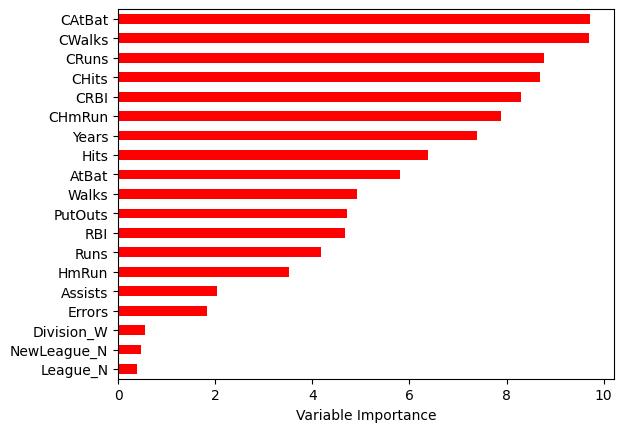

In [90]:
Importance = pd.DataFrame({"Importance":rf_tuned_model.feature_importances_*100},
                          index=X_train.columns)

Importance.sort_values(by ="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color ="r")

plt.xlabel("Variable Importance")
plt.gca().legend_ = None